In [85]:
import numpy as np
import pandas as pd
import json
import ast
from operator import itemgetter
from itertools import chain
from collections import OrderedDict
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
csv_data = pd.read_excel("alpha_occur_cleaned_data.xlsx", header = None)
print(csv_data.head)


<bound method NDFrame.head of                             0      1  \
0                       title     id   
1                     Blondie   3924   
2                  Four Rooms      5   
3              Judgment Night      6   
4                   Star Wars     11   
...                       ...    ...   
19289               Arbitrage  60599   
19290       The Lather Effect  60600   
19291          Death Scenes 2  60602   
19292    The Sun Sets at Dawn  60606   
19293  How I Killed My Father  60608   

                                                2  \
0                                          genres   
1                                      ['Comedy']   
2                             ['Crime', 'Comedy']   
3                 ['Action', 'Thriller', 'Crime']   
4      ['Adventure', 'Action', 'Science Fiction']   
...                                           ...   
19289                       ['Drama', 'Thriller']   
19290                         ['Comedy', 'Drama']   
19291       

In [68]:
genredict = {}
def gettags(index):

    taglist = []
    taglist = ast.literal_eval(csv_data[3][index])
    #print(taglist)
    return taglist

def getgenre(index):

    genrelist = []
    genrelist = ast.literal_eval(csv_data[2][index])
    #print(genrelist)
    return genrelist

def addtagtogenre(genre, taglist):
    if genre not in genredict:
        genredict[genre] = {}
    for tag in taglist:
        if tag in genredict[genre]:
            genredict[genre][tag] += 1
        else:
            genredict[genre][tag] = 1

def sortdict(dict):
    sorted_dict = OrderedDict(sorted(dict.items(), key=lambda x: x[1], reverse=True))
    return sorted_dict

for i in range(1, len(csv_data), 1):
    genrelist = getgenre(i)
    taglist = gettags(i)
    for genre in genrelist:
        addtagtogenre(genre, taglist) 



In [100]:


#can change the genre to anything and it will print the top keywords for that genre

print(sortdict(genredict["Horror"]))

    

OrderedDict([('murder', 394), ('vampir', 194), ('violenc', 180), ('serial kil', 180), ('monster', 170), ('slasher', 165), ('zombi', 162), ('reveng', 132), ('sequel', 118), ('based on novel or book', 106), ('alien', 103), ('cult film', 100), ('gore', 100), ('supernatur', 86), ('psychopath', 84), ('demon', 84), ('remak', 74), ('nightmar', 73), ('experi', 73), ('werewolf', 72), ('woman director', 70), ('scientist', 69), ('horror', 65), ('death', 63), ('tortur', 61), ('rape', 58), ('mad scientist', 57), ('mutant', 57), ('small town', 56), ('killer', 56), ('cannib', 55), ('possess', 55), ('teenag', 52), ('occult', 52), ('ghost', 52), ('haunted hous', 52), ('island', 50), ('curs', 50), ('animal horror', 49), ('witch', 49), ('high school', 47), ('kidnap', 46), ('hammer horror', 46), ('animal attack', 45), ('transform', 45), ('sheriff', 43), ('evil', 43), ('hospit', 42), ('loss of loved on', 40), ('creatur', 40), ('halloween', 40), ('new york c', 39), ('suicid', 38), ('colleg', 37), ('london, 

getting list of all popular genres

In [74]:
def getallgenre():
    allgenre = {}
    for i in range(1, len(csv_data)):
        genres = ast.literal_eval(csv_data[2][i])
        for genre in genres:
            if genre in allgenre:
                allgenre[genre] += 1
            else:
                allgenre[genre] = 1

            
    sorted_dict = OrderedDict(sorted(allgenre.items(), key=lambda x: x[1], reverse=True))
    return sorted_dict

print(getallgenre())

OrderedDict([('Drama', 7830), ('Comedy', 6163), ('Thriller', 3825), ('Romance', 3165), ('Action', 3050), ('Horror', 2705), ('Crime', 2467), ('Adventure', 1959), ('Science Fiction', 1697), ('Family', 1637), ('Documentary', 1624), ('Music', 1333), ('Mystery', 1330), ('Fantasy', 1197), ('Animation', 899), ('TV Movie', 687), ('Western', 650), ('History', 606), ('War', 600)])


(-0.5, 999.5, 299.5, -0.5)

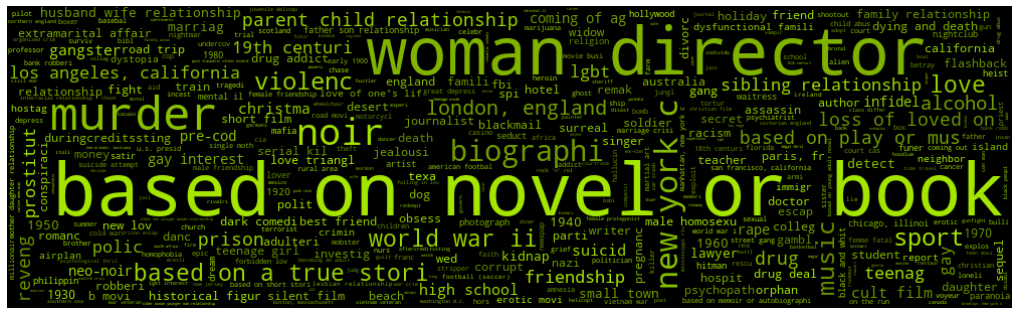

In [92]:
#print(sortdict(genredict["Drama"]))

def random_color(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#_____________________________________________
# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
#_______________________________________________________
# I define the dictionary used to produce the wordcloud
words = sortdict(genredict["Drama"])

tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')

(-0.5, 999.5, 299.5, -0.5)

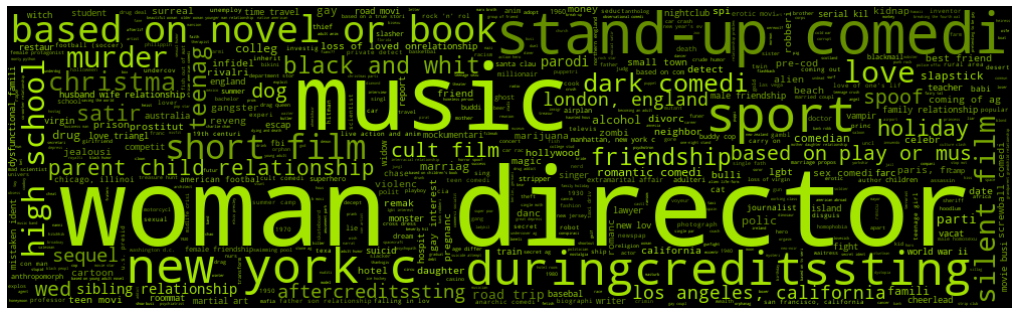

In [88]:
#print(sortdict(genredict["Comedy"]))

words = sortdict(genredict["Comedy"])

fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)

tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')

(-0.5, 999.5, 299.5, -0.5)

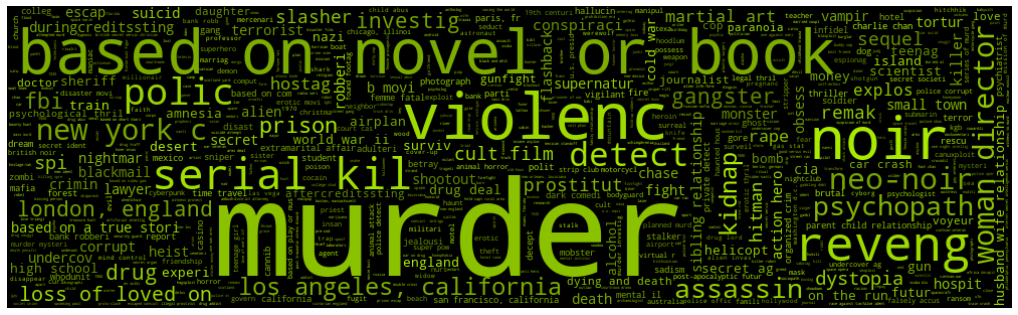

In [93]:
#print(sortdict(genredict["Thriller"]))

words = sortdict(genredict["Thriller"])

fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)

tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')

1
